<pre>
필요한 라이브러리를 불러옵니다.
</pre>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats
import re
import missingno as msno
%matplotlib inline

In [2]:
#폰트 설정
fontpath = "/usr/share/fonts/RIDIBatang.otf"
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname=fontpath).get_name()
rc('font', family=font_name)
#마이너스 부호 깨짐 방지
import matplotlib

In [3]:
#데이터 로드하기
df = pd.read_csv('SUM.csv')

In [4]:
df

,monthCode,serviceId,userId,timeSpent,numberOfDays
0,201112,13,59749,136.0,3
1,201112,14,15220,33.0,1
2,201112,14,15471,812.0,19
3,201112,14,15583,38.0,1
4,201112,14,15777,6.0,1
...,...,...,...,...,...
708839,201102,19,8358,964.0,11
708840,201102,19,8483,38.0,1
708841,201101,22,44198,30.0,1
708842,201101,22,44313,143.0,2


<pre>
데이터를 불러 온 후, 데이터의 요약정보들을 확인합니다.
</pre>

In [5]:
df.shape

(708844, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708844 entries, 0 to 708843
Data columns (total 5 columns):
monthCode       708844 non-null int64
serviceId       708844 non-null int64
userId          708844 non-null int64
timeSpent       706235 non-null float64
numberOfDays    708844 non-null int64
dtypes: float64(1), int64(4)
memory usage: 27.0 MB


In [7]:
df.head()

,monthCode,serviceId,userId,timeSpent,numberOfDays
0,201112,13,59749,136.0,3
1,201112,14,15220,33.0,1
2,201112,14,15471,812.0,19
3,201112,14,15583,38.0,1
4,201112,14,15777,6.0,1


In [8]:
df.tail()

,monthCode,serviceId,userId,timeSpent,numberOfDays
708839,201102,19,8358,964.0,11
708840,201102,19,8483,38.0,1
708841,201101,22,44198,30.0,1
708842,201101,22,44313,143.0,2
708843,201101,22,44337,318.0,5


In [9]:
df['monthCode_str'] = df['monthCode'].astype(str)

In [10]:
print(df['monthCode_str'].dtype)

object


In [11]:
df['month'] = df['monthCode_str'].str[4:6]

In [12]:
df['year'] = df['monthCode_str'].str[0:4]

In [13]:
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)
#df['timeSpent'] = df['timeSpent'].astype(int)

<pre>
상단 monthCode를 활용할 수 있는 데이터로 연도 / 월을 분리하는 과정을 거친 후 외부 코드에서 date타입으로 변경하여 저장한 
정제된 데이터를 df으로 다시 불러옵니다.</pre>

In [14]:
df = pd.read_csv('service2.csv')

In [15]:
#데이터 info 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708844 entries, 0 to 708843
Data columns (total 9 columns):
Unnamed: 0      708844 non-null int64
monthCode       708844 non-null int64
serviceId       708844 non-null int64
userId          708844 non-null int64
timeSpent       706235 non-null float64
numberOfDays    708844 non-null int64
year            708844 non-null int64
month           708844 non-null int64
ymd             708844 non-null object
dtypes: float64(1), int64(7), object(1)
memory usage: 48.7+ MB


In [16]:
df

,Unnamed: 0,monthCode,serviceId,userId,timeSpent,numberOfDays,year,month,ymd
0,0,201112,13,59749,136.0,3,2011,12,2011-12-01
1,1,201112,14,15220,33.0,1,2011,12,2011-12-01
2,2,201112,14,15471,812.0,19,2011,12,2011-12-01
3,3,201112,14,15583,38.0,1,2011,12,2011-12-01
4,4,201112,14,15777,6.0,1,2011,12,2011-12-01
...,...,...,...,...,...,...,...,...,...
708839,708839,201102,19,8358,964.0,11,2011,2,2011-02-01
708840,708840,201102,19,8483,38.0,1,2011,2,2011-02-01
708841,708841,201101,22,44198,30.0,1,2011,1,2011-01-01
708842,708842,201101,22,44313,143.0,2,2011,1,2011-01-01


<pre>
결측값을 확인하고 처리하여 전처리과정을 거칩니다.
</pre>

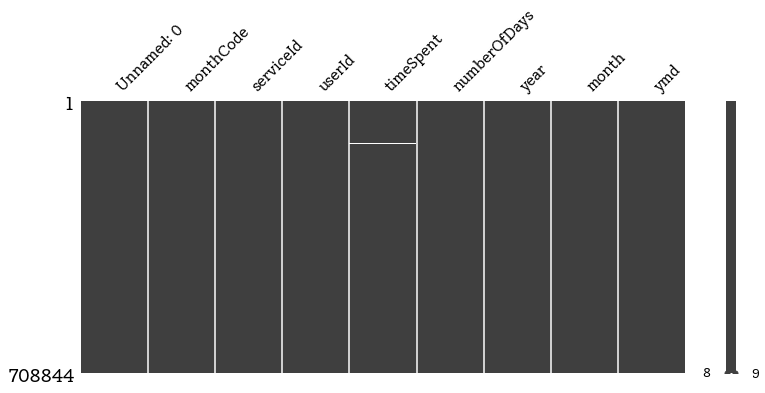

In [17]:
#결측값 확인
msno.matrix(df, figsize=(12,5))

In [18]:
#결측치 확인
null_count = df.isnull().sum()
null_count

Unnamed: 0         0
monthCode          0
serviceId          0
userId             0
timeSpent       2609
numberOfDays       0
year               0
month              0
ymd                0
dtype: int64

In [19]:
#df내 결측치 있는 row 처리
df_t = df.dropna(axis=0)

In [20]:
df_t.columns

Index(['Unnamed: 0', 'monthCode', 'serviceId', 'userId', 'timeSpent',
       'numberOfDays', 'year', 'month', 'ymd'],
      dtype='object')

In [21]:
df_t_drop = df.drop(['Unnamed: 0','monthCode','year','ymd'], axis = 1)

In [22]:
df_t

,Unnamed: 0,monthCode,serviceId,userId,timeSpent,numberOfDays,year,month,ymd
0,0,201112,13,59749,136.0,3,2011,12,2011-12-01
1,1,201112,14,15220,33.0,1,2011,12,2011-12-01
2,2,201112,14,15471,812.0,19,2011,12,2011-12-01
3,3,201112,14,15583,38.0,1,2011,12,2011-12-01
4,4,201112,14,15777,6.0,1,2011,12,2011-12-01
...,...,...,...,...,...,...,...,...,...
708839,708839,201102,19,8358,964.0,11,2011,2,2011-02-01
708840,708840,201102,19,8483,38.0,1,2011,2,2011-02-01
708841,708841,201101,22,44198,30.0,1,2011,1,2011-01-01
708842,708842,201101,22,44313,143.0,2,2011,1,2011-01-01


In [23]:
#결측치 재 확인
null_count_2 = df_t.isnull().sum()
null_count_2

Unnamed: 0      0
monthCode       0
serviceId       0
userId          0
timeSpent       0
numberOfDays    0
year            0
month           0
ymd             0
dtype: int64

In [24]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706235 entries, 0 to 708843
Data columns (total 9 columns):
Unnamed: 0      706235 non-null int64
monthCode       706235 non-null int64
serviceId       706235 non-null int64
userId          706235 non-null int64
timeSpent       706235 non-null float64
numberOfDays    706235 non-null int64
year            706235 non-null int64
month           706235 non-null int64
ymd             706235 non-null object
dtypes: float64(1), int64(7), object(1)
memory usage: 53.9+ MB


In [25]:
df_t['timeSpent'].describe()

count    706235.000000
mean        701.656691
std        1860.746967
min           0.000000
25%          30.000000
50%         112.000000
75%         562.000000
max      153469.000000
Name: timeSpent, dtype: float64

In [26]:
df_t['month'].value_counts()

12    72919
8     65219
7     64971
1     64114
2     60187
11    59361
9     58543
10    56428
6     54143
5     54138
3     51259
4     44953
Name: month, dtype: int64

In [27]:
df_t['month'].value_counts(normalize=True)

12    0.103250
8     0.092347
7     0.091996
1     0.090783
2     0.085222
11    0.084053
9     0.082895
10    0.079900
6     0.076664
5     0.076657
3     0.072581
4     0.063652
Name: month, dtype: float64

In [28]:
month_normalize = df_t['month'].value_counts(normalize=True)

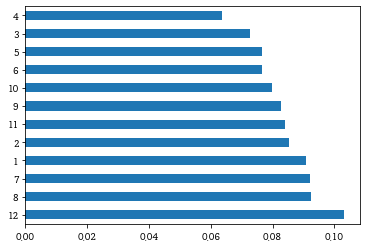

In [29]:
month_normalize.plot.barh()

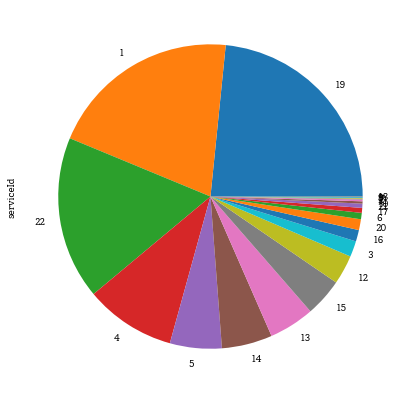

In [30]:
df_t['serviceId'].value_counts(normalize=True).plot.pie(figsize = (7,7))

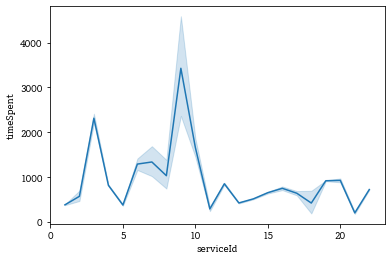

In [31]:
sns.lineplot(data=df_t, y = 'timeSpent' , x = 'serviceId')

In [32]:
df_t.columns

Index(['Unnamed: 0', 'monthCode', 'serviceId', 'userId', 'timeSpent',
       'numberOfDays', 'year', 'month', 'ymd'],
      dtype='object')

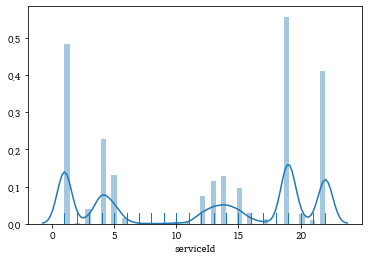

In [33]:
sns.distplot(df_t['serviceId'],rug=True)

In [34]:
df_t.describe()

,Unnamed: 0,monthCode,serviceId,userId,timeSpent,numberOfDays,year,month
count,706235.000000,706235.000000,706235.000000,706235.00000,706235.000000,706235.000000,706235.0,706235.000000
mean,354425.700973,201106.668234,12.244482,33095.85064,701.656691,5.941085,2011.0,6.668234
std,204618.694237,3.532034,8.124344,19273.49482,1860.746967,7.086393,0.0,3.532034
min,0.000000,201101.000000,1.000000,1.00000,0.000000,1.000000,2011.0,1.000000
25%,177224.500000,201104.000000,4.000000,15600.00000,30.000000,1.000000,2011.0,4.000000
50%,354399.000000,201107.000000,14.000000,32318.00000,112.000000,3.000000,2011.0,7.000000
75%,531622.500000,201110.000000,19.000000,51034.00000,562.000000,8.000000,2011.0,10.000000
max,708843.000000,201112.000000,22.000000,65143.00000,153469.000000,31.000000,2011.0,12.000000


<pre>
정제된 데이터의 desciption을 확인하고 시각화하여 데이터의 특징을 확인합니다.
</pre>

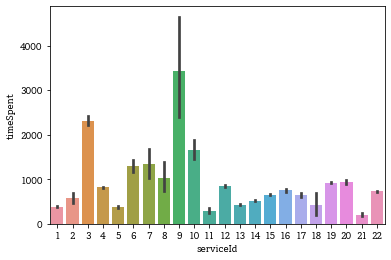

In [35]:
sns.barplot(data = df_t, x = 'serviceId', y = 'timeSpent')

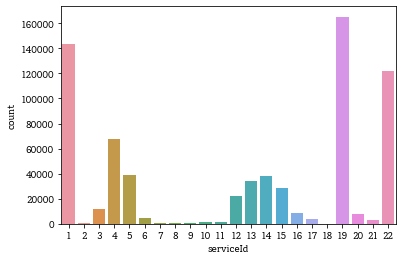

In [36]:
sns.countplot(x='serviceId', data = df_t)

<pre>
serviceId를 기준으로 그룹화 하여 timeSpent 변수의 description을 확인합니다.
</pre>

In [37]:
grouped = df_t['timeSpent'].groupby(df_t['serviceId'])

In [38]:
grouped

In [39]:
palette = sns.color_palette("muted",22)

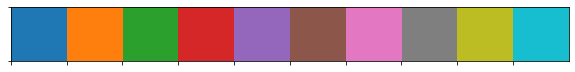

In [40]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

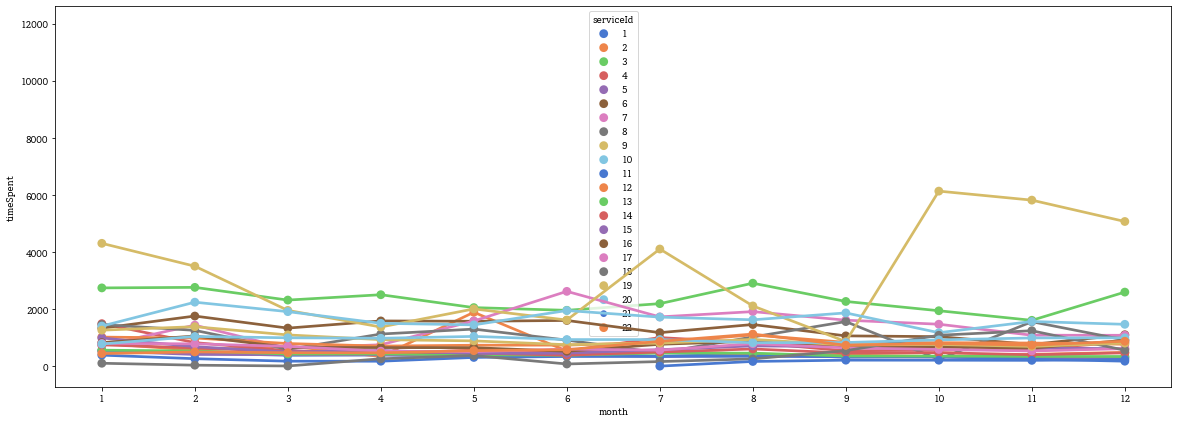

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(20,7)
sns.set_palette("muted",22)
sns.pointplot(x = 'month' , y = 'timeSpent' , hue = 'serviceId', errwidth=0, data = df_t)

In [42]:
grouped.size()

serviceId
1     143760
2        586
3      11874
4      68043
5      38854
6       4763
7        515
8        495
9        464
10      1718
11      1330
12     21952
13     34138
14     37914
15     28589
16      8594
17      3685
18       158
19    165245
20      8126
21      3164
22    122268
Name: timeSpent, dtype: int64

In [ ]:
df_trans_val1 = df_group_sum.transpose()

In [ ]:
df_trans_val1

In [50]:
grouped.mean()

serviceId
1      384.328506
2      574.116041
3     2315.159424
4      820.001558
5      380.576337
6     1292.995591
7     1339.671845
8     1034.151515
9     3427.993534
10    1662.862631
11     292.906015
12     853.901148
13     426.555598
14     517.302131
15     655.462975
16     752.567838
17     642.818182
18     424.227848
19     921.375255
20     929.524735
21     205.343236
22     725.124571
Name: timeSpent, dtype: float64

In [51]:
grouped.median()

serviceId
1      55.0
2     109.0
3      58.0
4     151.0
5      55.0
6      40.0
7      29.0
8       8.0
9      67.0
10     79.5
11     44.0
12    165.0
13     67.0
14    104.0
15     83.0
16     89.0
17    110.0
18     13.5
19    193.0
20    117.0
21     49.0
22    226.0
Name: timeSpent, dtype: float64

In [52]:
group_desc = grouped.describe()

In [53]:
group_desc

,count,mean,std,min,25%,50%,75%,max
serviceId,,,,,,,,
1,143760.0,384.328506,1501.968473,0.0,21.0,55.0,199.00,42945.0
2,586.0,574.116041,1392.419202,0.0,35.0,109.0,435.50,14655.0
3,11874.0,2315.159424,5392.904531,0.0,2.0,58.0,1702.75,41175.0
4,68043.0,820.001558,1922.948214,0.0,20.0,151.0,793.00,40597.0
5,38854.0,380.576337,1814.849555,0.0,19.0,55.0,186.00,81897.0
6,4763.0,1292.995591,4777.842962,0.0,5.0,40.0,428.50,115269.0
7,515.0,1339.671845,3951.912505,0.0,3.0,29.0,454.00,46118.0
8,495.0,1034.151515,3575.677751,0.0,1.0,8.0,137.00,32079.0
9,464.0,3427.993534,12347.614827,0.0,10.0,67.0,928.25,153469.0


In [54]:
df_trans_val2 = group_desc.transpose()

In [55]:
df_group_des = pd.DataFrame(group_desc)

In [56]:
df_group_des

,count,mean,std,min,25%,50%,75%,max
serviceId,,,,,,,,
1,143760.0,384.328506,1501.968473,0.0,21.0,55.0,199.00,42945.0
2,586.0,574.116041,1392.419202,0.0,35.0,109.0,435.50,14655.0
3,11874.0,2315.159424,5392.904531,0.0,2.0,58.0,1702.75,41175.0
4,68043.0,820.001558,1922.948214,0.0,20.0,151.0,793.00,40597.0
5,38854.0,380.576337,1814.849555,0.0,19.0,55.0,186.00,81897.0
6,4763.0,1292.995591,4777.842962,0.0,5.0,40.0,428.50,115269.0
7,515.0,1339.671845,3951.912505,0.0,3.0,29.0,454.00,46118.0
8,495.0,1034.151515,3575.677751,0.0,1.0,8.0,137.00,32079.0
9,464.0,3427.993534,12347.614827,0.0,10.0,67.0,928.25,153469.0


In [57]:
df_group_des = df_group_des.reset_index().rename(columns={'index':'serviceId'})

In [58]:
df_group_des.columns

Index(['serviceId', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

<pre>그룹화 하여 파악한 serviceId와 timeSpent의 description을 시각화합니다.</pre>

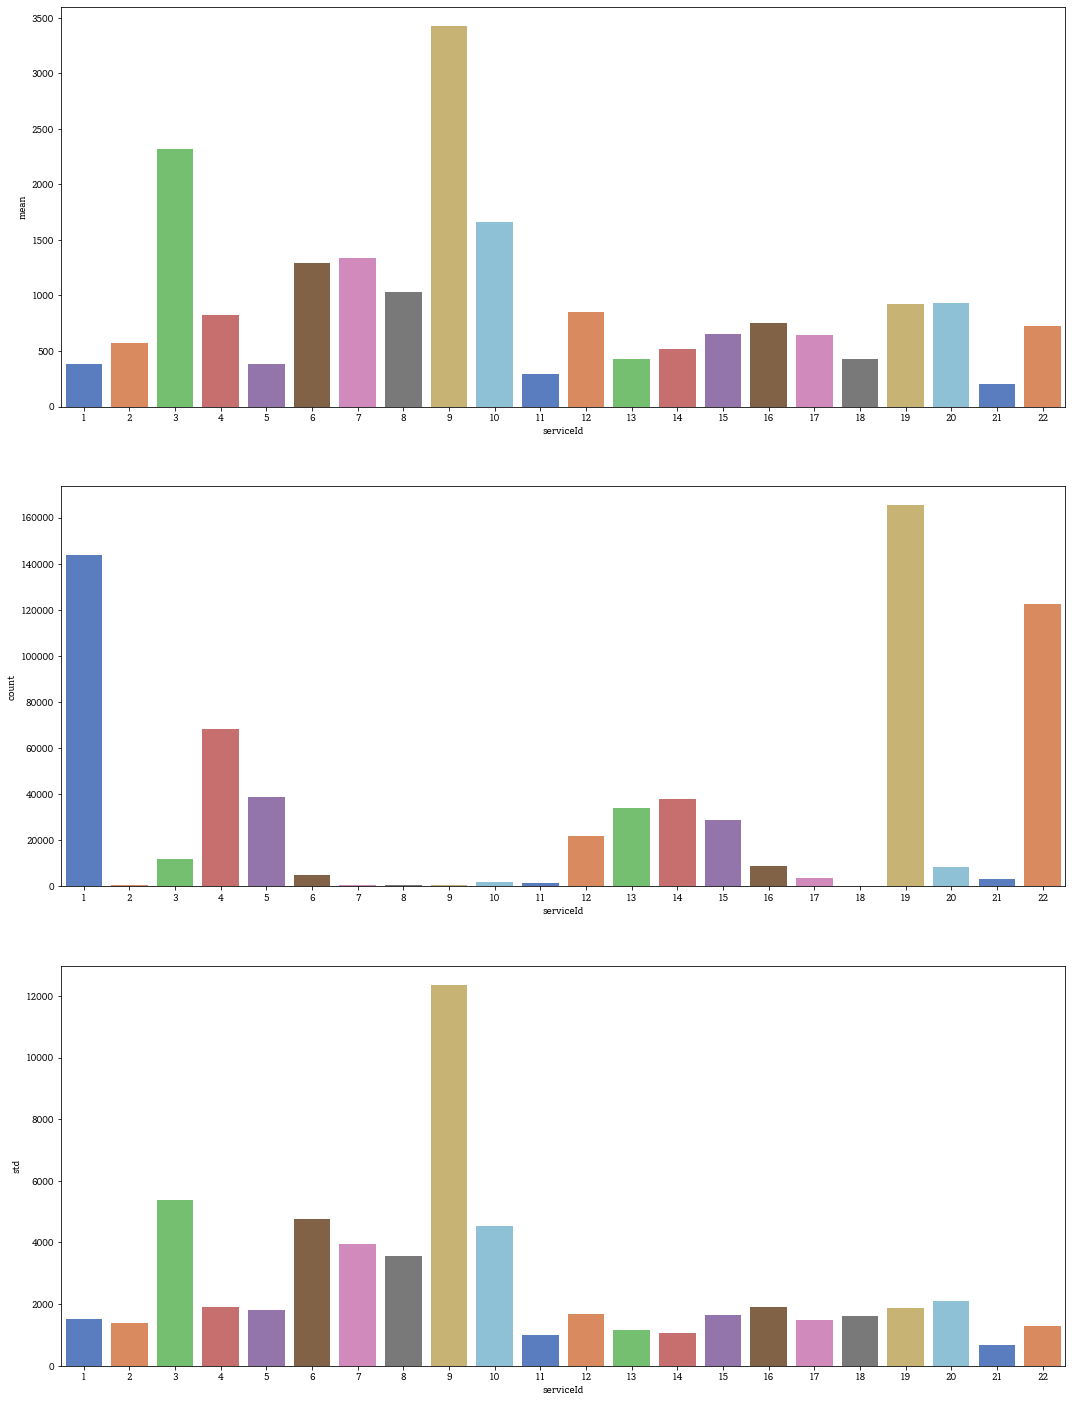

In [59]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=3)
fig.set_size_inches(18,25)

sns.barplot(x = 'serviceId' , y = 'mean' , errwidth=0, data = df_group_des , ax = ax1)
sns.barplot(x = 'serviceId' , y = 'count' , errwidth = 0 , data = df_group_des, ax = ax2)
sns.barplot(x = 'serviceId' , y = 'std' , errwidth = 0 , data = df_group_des , ax = ax3)

<pre>df_t 내 변수들간의 상관관계를 분석합니다.</pre>

In [60]:
servicematt = df_t[['serviceId','timeSpent','month','numberOfDays']]

In [61]:
servicematt = servicematt.corr()

In [62]:
#상관관계 분석
print(servicematt)

              serviceId  timeSpent     month  numberOfDays
serviceId      1.000000   0.054689  0.078480      0.152369
timeSpent      0.054689   1.000000 -0.027795      0.683526
month          0.078480  -0.027795  1.000000     -0.013324
numberOfDays   0.152369   0.683526 -0.013324      1.000000


In [63]:
mask = np.array(servicematt)

In [64]:
mask[np.tril_indices_from(mask)] = False

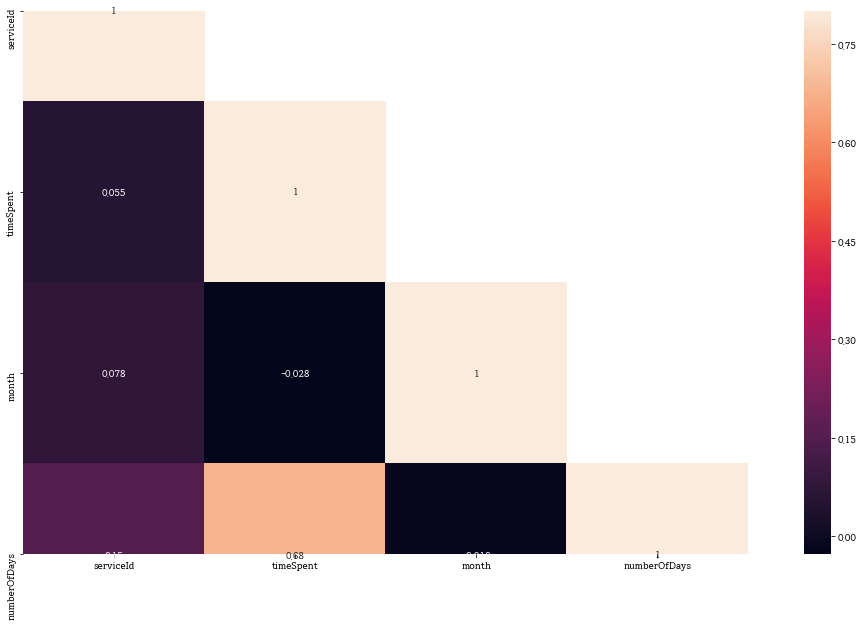

In [65]:
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(servicematt,mask=mask, vmax = .8 , square = True, annot = True)

In [66]:
df_t.corr()

,Unnamed: 0,monthCode,serviceId,userId,timeSpent,numberOfDays,year,month
Unnamed: 0,1.000000,0.223622,0.021180,-0.040642,-0.003038,-0.003410,NaN,0.223622
monthCode,0.223622,1.000000,0.078480,-0.004398,-0.027795,-0.013324,NaN,1.000000
serviceId,0.021180,0.078480,1.000000,-0.004108,0.054689,0.152369,NaN,0.078480
userId,-0.040642,-0.004398,-0.004108,1.000000,-0.005933,-0.000861,NaN,-0.004398
timeSpent,-0.003038,-0.027795,0.054689,-0.005933,1.000000,0.683526,NaN,-0.027795
numberOfDays,-0.003410,-0.013324,0.152369,-0.000861,0.683526,1.000000,NaN,-0.013324
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.223622,1.000000,0.078480,-0.004398,-0.027795,-0.013324,NaN,1.000000
